# Clase Supervised Classification ML

## Importar librerías

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load
# Cargamos el modelo y lo creamos
from sklearn.tree import DecisionTreeClassifier

## Importar los datos

In [2]:
df = pd.read_excel('diabetes_clean.xlsx')
df.sample(8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
485,7,150,78,29,126,35.2,692.0,54,Unsatisfied,High School Teacher,1
548,2,56,56,28,45,24.2,332.0,22,Satisfied,Market Research Analyst,0
559,4,127,88,11,155,34.5,598.0,28,Extremely satisfied,Human Resources,0
288,1,196,76,36,249,36.5,875.0,29,Satisfied,Human Resources,1
221,7,106,60,24,0,26.5,296.0,29,Extremely unsatisfied,High School Teacher,1
504,5,128,80,0,0,34.6,144.0,45,Extremely unsatisfied,High School Teacher,0
207,3,111,56,39,0,30.1,557.0,30,Extremely unsatisfied,High School Teacher,0
573,1,108,60,46,178,35.5,415.0,24,Extremely satisfied,Human Resources,0


## Detectar y tratar duplicados

In [3]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome


## Detectar y tratar valores nulos

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Satisfaction                0
Job                         0
Outcome                     0
dtype: int64

In [5]:
numericas=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in numericas:
  df[i].fillna(df[i].mean(),inplace=True)

df['Satisfaction'].fillna(df['Satisfaction'].mode()[0],inplace=True)
df['Job'].fillna(df['Job'].mode()[0],inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Satisfaction                0
Job                         0
Outcome                     0
dtype: int64

## Detectar y tratar valores atípicos (ouliers)

In [6]:
# FUNCIÓN QUE DEVUELVE LOS NÚMEROS DE FILA EN LOS QUE LA VARIABLE EN CUESTIÓN ES OULIER
def outliers(var):
  q1=var.quantile(0.25)
  q3=var.quantile(0.75)
  riq=q3-q1
  sup=q3+1.5*(riq)
  inf=q1-1.5*(riq)
  outl=(var>sup) | (var<inf)
  return outl

for i in df.loc[:,numericas]:
  print("Cantida de oultliers de la variable",i,":",outliers(df[i]).sum())
# Eliminar outliers
# Tu código
for i in df.loc[:,numericas]:
  df=df[~outliers(df[i])]
df.sample(5)

Cantida de oultliers de la variable Pregnancies : 0
Cantida de oultliers de la variable Glucose : 9
Cantida de oultliers de la variable BloodPressure : 4
Cantida de oultliers de la variable SkinThickness : 0
Cantida de oultliers de la variable Insulin : 4
Cantida de oultliers de la variable BMI : 4
Cantida de oultliers de la variable DiabetesPedigreeFunction : 10
Cantida de oultliers de la variable Age : 10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
507,0,102,78,40,90,34.5,238.0,24,Satisfied,High School Teacher,0
66,0,101,65,28,0,24.6,237.0,22,Extremely satisfied,High School Teacher,0
71,1,80,55,0,0,19.1,258.0,21,Extremely satisfied,High School Teacher,0
282,4,137,84,0,0,31.2,252.0,30,Unsatisfied,Market Research Analyst,0
496,2,68,62,13,15,20.1,257.0,23,Unsatisfied,High School Teacher,0


# Preparamos los datos



## Transformar variables ordinales en numéricas

Como vemos tenemos la variable Satisfaction que es una variable ordinal y podemos suponer que el impacto que podrá tener sobre la variable a predecir (diabetes si/no) permanecerá constante al pasar de una categoría a la siguiente. por eso, la codificaremos como variable ordinal

In [7]:
df['Satisfaction'].value_counts()

Unsatisfied              177
Extremely unsatisfied    151
Extremely satisfied      142
Satisfied                106
Name: Satisfaction, dtype: int64

In [8]:
# Creamos el objeto que realizará la transformación dándole el orden en una lista con doble corchete
enc=OrdinalEncoder(categories=[['Extremely unsatisfied','Unsatisfied','Satisfied','Extremely satisfied']],dtype='int')
# Particularizamos el codificador en nuestros datos
# Tu código
enc.fit(df[['Satisfaction']])
# Aplicamos el codificador ya particularizado a nuestros datos y lo guardamos machacando la misma variable
# Tu código
df['Satisfaction']=enc.transform(df[['Satisfaction']])
print(df.shape)
df.sample(5)

(576, 11)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job,Outcome
180,7,142,60,33,190,28.8,687.0,61,1,Statistician,0
170,1,96,64,27,87,33.2,289.0,21,0,Legislator,0
160,4,109,64,44,99,34.8,905.0,26,0,Human Resources,1
434,3,128,72,25,190,32.4,549.0,27,3,Human Resources,1
81,1,151,60,0,0,26.1,179.0,22,0,High School Teacher,0


In [9]:
# Guardamos el codificador
dump(enc, 'ordinal.cod') # Guardamos el ordinal encoder

['ordinal.cod']

## Transformar variables nominales en numéricas

Como vemos tenemos la variable Job que es una variable nominal (sin orden) y debenmos codificarla mediante el One-Hot encoder

In [10]:
# Tu código
# Creamos el objeto que realizará la transformación
onehot=OneHotEncoder()
a=onehot.fit_transform(df[['Job']])
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['Job']))
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df=pd.concat([df,encoded_df],axis=1)
df.drop(columns='Job',inplace=True)
print(df.shape)
df.sample(5)

(576, 20)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Outcome,Job_Database Administrator,Job_Epidemiologist,Job_Financial Analyst,Job_Firefighter,Job_High School Teacher,Job_Human Resources,Job_Legislator,Job_Market Research Analyst,Job_Physicians,Job_Statistician
91,5,124,74,0,0,34.0,0.22,38,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
97,3,120,70,30,135,42.9,452.00,30,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
215,7,133,88,15,155,32.4,262.00,37,3,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
366,0,135,68,42,250,42.3,365.00,24,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
557,11,120,80,37,150,42.3,785.00,48,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Guardamos el codificador
dump(onehot, 'onehot.cod') # Guardamos el one hot encoder

['onehot.cod']

# DECISION TREE. NO Usamos la estandarización

## 0. Separar la variable a predecir y las predictoras

In [12]:
X=df.drop(columns=['Outcome'],inplace=False)
y=df['Outcome']

In [13]:
print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (576, 19)
Tamaño y (576,)


## 1. Split. Separar los datos en conjunto de entrenamiento (train) y conjunto de evaluación o test(test)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
print("Tamaño X_train",X_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (432, 19)
Tamaño X_test (144, 19)
Tamaño y_train (432,)
Tamaño y_test (144,)


## 3. Fit. Entrenar el modelo

* Creamos el modelo
* Entrenamos el modelo sobre los datos de train y obtenemos el modelo entrenado

In [21]:
# Cargamos el modelo y lo creamos
dtree = DecisionTreeClassifier(max_depth=3)
# Ahora dtree ya es un modelo que se puede entrenar (fit)

In [22]:
# Entrenamos el modelo dtree
dtree.fit(X_train,y_train)
# Ahora dtree es un modelo entrenado capaz de hacer predicciones

DecisionTreeClassifier(max_depth=3)

## 4. Evaluar el Modelo

* Hacemos predicciones sobre el conjunto de test
* Comparamos esas predicciones con los valores reales. Calculamos la precisión (accuracy)

In [23]:
# Hacemos predicciones sobre el conjunto de test
predictions = dtree.predict(X_test)

# Calculamos la accuracy (porcentaje de observaciones con predicción correcta)
accuracy_score(y_test, predictions)
# Vemos que tenemos una accuracy del 79%. Es el porcentaje de observaciones con predicción correcta

0.7986111111111112

* Hay otras métricas que podemos usar. Todas aparecen a partir de la matriz de confusión

<Axes: >

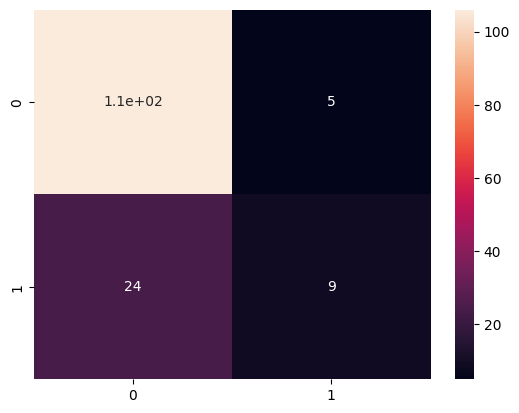

In [24]:
cm=confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

Las predicciones 0 1 están en columnas y la realidad 0 1 en filas. Por lo tanto, de la matriz de confusión podemos decir que:

* Hay ?? Verdaderos positivos
* Hay ?? Falsos negativos
* Hay ?? Falsos positivos
* Hay ?? Verdaderos positivos

<Axes: >

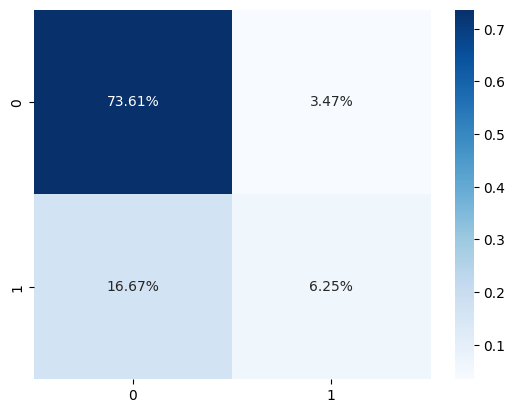

In [25]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

Conceptos importantes en modelos supervisados de clasificación

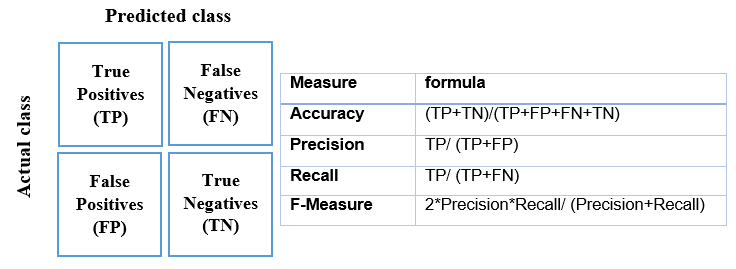

In [26]:
# Calculamos la accuracy (porcentaje de observaciones con predicción correcta)
accuracy_score(y_test, predictions)

0.7986111111111112

In [27]:
# Para hacerlos en Python
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.6428571428571429

In [28]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.2727272727272727

In [29]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.3829787234042553

## 5. Creamos el modelo final

* Creamos el modelo con todos los datos
* Guardamos el modelo

In [32]:
#Creamos /fitamos el modelo con todos los datos
dtree.fit(X_std,y)

DecisionTreeClassifier(max_depth=3)

In [33]:
# Guardamos el modelo
dump(dtree, 'decision_tree.model')

['decision_tree.model']

## 6. Usamos el modelo

* Volvemos a cargar el estandarizador y el modelo simulando que lo recuperamos
* Creamos los nuevos datos sobre los que queremos usar / hacer predicciones
* Los estandarizamos con el estandarizador recuperado
* Predecimos la variable 'Outcome' para esos nuevos datos

In [34]:
# Recuperamos los codificadores y el modelo
enc=load('ordinal.cod')
onehot=load('onehot.cod')
decision_tree_model = load('decision_tree.model')

In [36]:
# Tomamos los nuevos datos "diabetes_new_data.xlsx"
nuevo_df = pd.read_excel('diabetes_new_data.xlsx')
nuevo_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job
0,10,100,72,35,0,33.6,627,50,Extremely unsatisfied,Human Resources
1,1,85,70,29,0,26.6,351,31,Unsatisfied,Financial Analyst
2,0,183,64,5,10,30.0,672,32,Satisfied,High School Teacher
3,3,89,66,23,94,28.1,167,21,Extremely satisfied,Legislator


In [37]:
# Aplicamos las codificaciones a nuestros nuevos datos

# Primero la transformación de ordinales a numéricas (ordinal encoder)
nuevo_df['Satisfaction']=enc.transform(nuevo_df[['Satisfaction']])
print(nuevo_df.shape)
nuevo_df

(4, 10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job
0,10,100,72,35,0,33.6,627,50,0,Human Resources
1,1,85,70,29,0,26.6,351,31,1,Financial Analyst
2,0,183,64,5,10,30.0,672,32,2,High School Teacher
3,3,89,66,23,94,28.1,167,21,3,Legislator


In [38]:
# Ahora la transformación de categóricas sin orden a numéricas (one hot encoding)
a=onehot.transform(nuevo_df[['Job']])
encoded_nuevo_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['Job']))
nuevo_df.reset_index(drop=True, inplace=True)
encoded_nuevo_df.reset_index(drop=True, inplace=True)
nuevo_df=pd.concat([nuevo_df,encoded_nuevo_df],axis=1)
nuevo_df.drop(columns='Job',inplace=True)

print(nuevo_df.shape)
nuevo_df

(4, 19)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Satisfaction,Job_Database Administrator,Job_Epidemiologist,Job_Financial Analyst,Job_Firefighter,Job_High School Teacher,Job_Human Resources,Job_Legislator,Job_Market Research Analyst,Job_Physicians,Job_Statistician
0,10,100,72,35,0,33.6,627,50,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,85,70,29,0,26.6,351,31,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,183,64,5,10,30.0,672,32,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,89,66,23,94,28.1,167,21,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
# Predecimos la variable 'Outcome' para esos valores
new_predictions = decision_tree_model.predict(nuevo_df)
print(new_predictions)
# Nos predice que todos los casos van a tener diabetes

[0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# EXTRA. DIBUJAR EL ÁRBOL

[Text(0.5, 0.875, 'Glucose <= 0.979\ngini = 0.407\nsamples = 576\nvalue = [412, 164]\nclass = Not Diabetes'),
 Text(0.25, 0.625, 'Age <= -0.292\ngini = 0.318\nsamples = 474\nvalue = [380, 94]\nclass = Not Diabetes'),
 Text(0.125, 0.375, 'Glucose <= 0.392\ngini = 0.186\nsamples = 270\nvalue = [242, 28]\nclass = Not Diabetes'),
 Text(0.0625, 0.125, 'gini = 0.135\nsamples = 234\nvalue = [217, 17]\nclass = Not Diabetes'),
 Text(0.1875, 0.125, 'gini = 0.424\nsamples = 36\nvalue = [25, 11]\nclass = Not Diabetes'),
 Text(0.375, 0.375, 'BMI <= -0.861\ngini = 0.438\nsamples = 204\nvalue = [138, 66]\nclass = Not Diabetes'),
 Text(0.3125, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [37, 1]\nclass = Not Diabetes'),
 Text(0.4375, 0.125, 'gini = 0.476\nsamples = 166\nvalue = [101, 65]\nclass = Not Diabetes'),
 Text(0.75, 0.625, 'Glucose <= 1.382\ngini = 0.431\nsamples = 102\nvalue = [32, 70]\nclass = Diabetes'),
 Text(0.625, 0.375, 'Age <= 0.949\ngini = 0.5\nsamples = 41\nvalue = [21, 20]\nclass = N

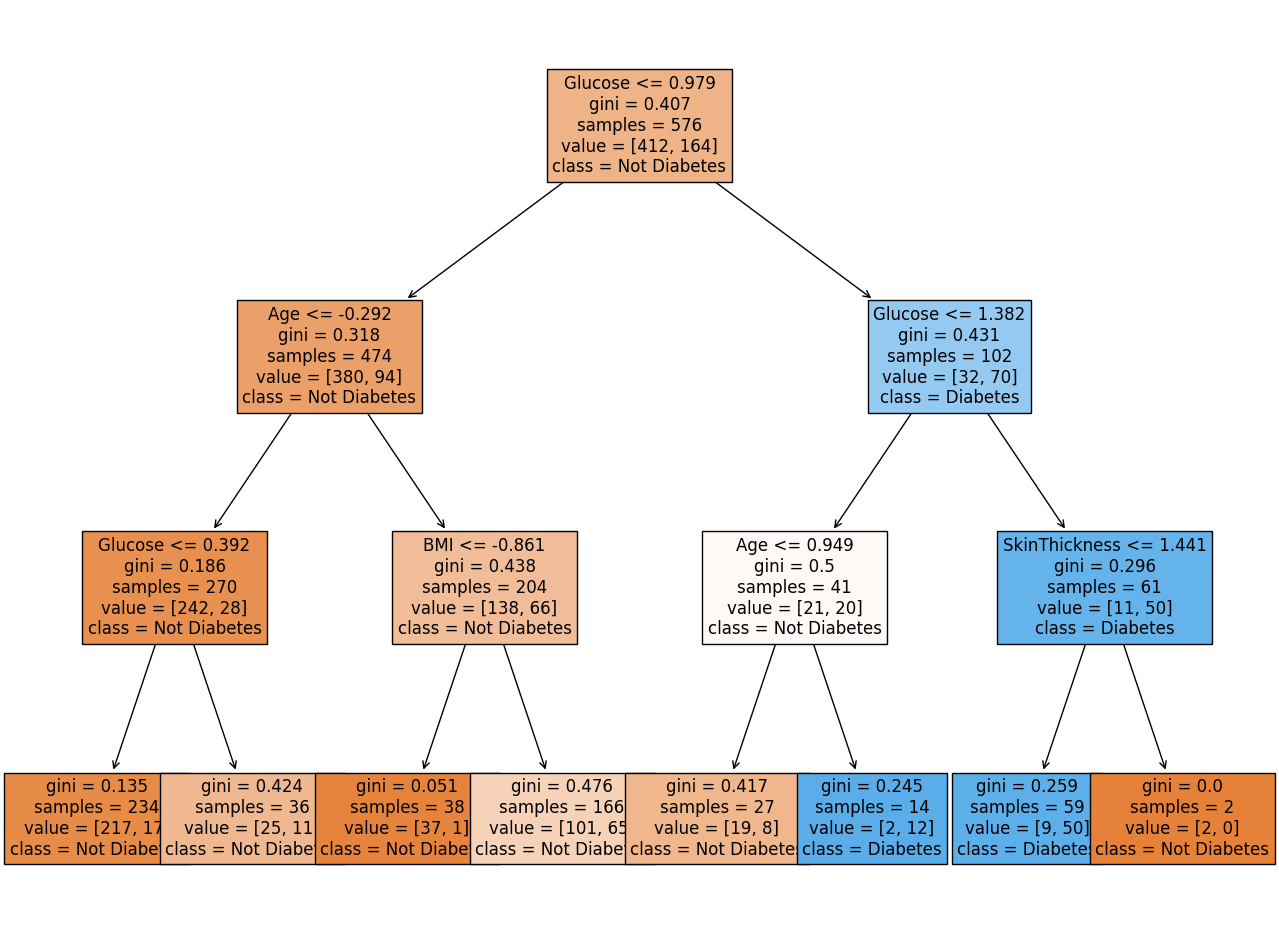

In [42]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,12))
plot_tree(dtree, feature_names=df.columns, fontsize=12, filled=True,
class_names=['Not Diabetes', 'Diabetes'])